<h1>Ejercicio 2 del Trabajo practico</h1>
<h2>Participantes:</h2>
<h3>Mateo Rovere</h3>
<h3>Valentin Dalmau</h3>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.linear_model import LinearRegression

In [12]:
df2 = pd.read_excel("tc_turistas.xlsx")
df3 = pd.read_excel("tc_turistas.xlsx", sheet_name = "llegadas de turistas")

In [13]:
df2.isna().sum()

FECHA              0
DOLAR Oficial    336
DOLAR Blue       333
dtype: int64

In [14]:
df2.dropna(how='any', inplace=True)
df2.reset_index(inplace=True)
df2['FECHA'] = df2.FECHA.dt.to_period('M')
df2.drop(columns = "index", inplace = True)
dffin =round(df2.groupby(by="FECHA").mean(),2)
dffin.reset_index(inplace=True)
dffin['FECHA'] = dffin['FECHA'].astype('str')

,FECHA,DOLAR Oficial,DOLAR Blue
0,2017-06,16.32,16.51
1,2017-07,17.40,17.12
2,2017-08,17.62,18.18
3,2017-09,17.45,17.95
4,2017-10,17.67,17.97
5,2017-11,17.68,18.05
6,2017-12,17.94,18.30
7,2018-01,19.28,19.66
8,2018-02,20.08,20.15
9,2018-03,20.49,20.74


<Axes: xlabel='FECHA'>

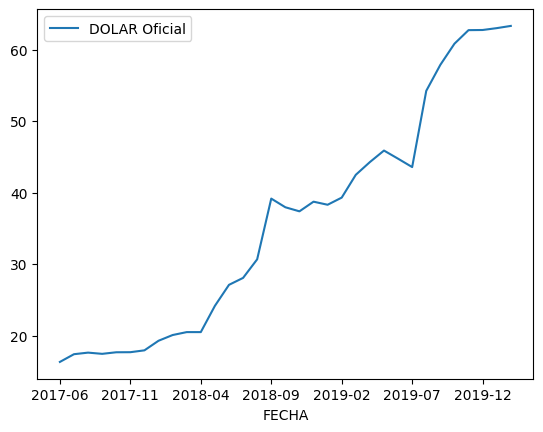

In [15]:
dfseriedetiempo = dffin[["FECHA","DOLAR Oficial"]]
dfseriedetiempo = dfseriedetiempo.set_index("FECHA")
dfseriedetiempo.plot()

In [16]:
df3['Bolivia'] = df3['Bolivia'].astype('int')
df3['Brasil'] = df3['Brasil'].astype('int')
df3['Chile'] = df3['Chile'].astype('int')
df3['Paraguay'] = df3['Paraguay'].astype('int')
df3['Uruguay'] = df3['Uruguay'].astype('int')

In [17]:
mesnum = {'ene':'01',
          'feb':'02',
          'mar':'03',
          'abr':'04',
          'may':'05',
          'jun':'06',
          'jul':'07',
          'ago':'08',
          'sep':'09',
          'oct':'10',
          'nov':'11',
          'dic':'12'
}


dflol = df3.replace({"mes": mesnum})

In [18]:
dflol['anio'] = dflol['anio'].astype('str')
dflol["FECHA"] = dflol["anio"] + "-" + dflol["mes"]
dflol.drop(columns="date", inplace= True)
dflol.drop(columns='anio', inplace= True)
dflol.drop(columns='mes', inplace= True)
dflol

,Bolivia,Brasil,Chile,Paraguay,Uruguay,FECHA
0,141417,112996,66007,50277,52456,2013-01
1,95204,161366,62013,52666,41377,2013-02
2,82862,96727,81096,92714,43728,2013-03
3,72009,66978,55096,67716,27458,2013-04
4,79131,63886,61641,70544,23592,2013-05
...,...,...,...,...,...,...
94,1868,1148,1428,704,594,2020-11
95,3475,2825,2039,1181,1262,2020-12
96,2103,2280,936,420,3618,2021-01
97,874,1419,476,879,1713,2021-02


In [19]:
dflol.loc[dflol['Chile'] <= -1] #😨

,Bolivia,Brasil,Chile,Paraguay,Uruguay,FECHA
63,87508,77916,-2147483648,57205,34821,2018-04


In [20]:
dflol.at[63,"Chile"] = 0

In [21]:
for i in dflol.columns:
    print(max(dflol[i])) # o el minimo tambien

187955
242582
162180
138972
86374
2021-03


In [22]:
#claramente hay un numero erroneo en el dataframe de chile, lo vamos a imputar haciendo la relacion promedio de personas que
#viajaron desde chile a argentina con respecto a el total de las personas que viajaron desde los otros paises disponibles

dflol["relacion_de_chilenos"] = dflol["Chile"]/(dflol["Bolivia"]+dflol["Brasil"]+dflol["Paraguay"]+dflol["Uruguay"])
promedio_chilenos = dflol["relacion_de_chilenos"].mean()
dflol["relacion_de_chilenos"].mean()
entero = dflol["relacion_de_chilenos"].mean() * (dflol.at[63,"Bolivia"]+dflol.at[63,"Brasil"]+dflol.at[63,"Paraguay"]+dflol.at[63,"Uruguay"])
dflol.at[63,"Chile"] = int(entero)
dflol.head(65)


,Bolivia,Brasil,Chile,Paraguay,Uruguay,FECHA,relacion_de_weones
0,141417,112996,66007,50277,52456,2013-01,0.184818
1,95204,161366,62013,52666,41377,2013-02,0.176870
2,82862,96727,81096,92714,43728,2013-03,0.256608
3,72009,66978,55096,67716,27458,2013-04,0.235291
4,79131,63886,61641,70544,23592,2013-05,0.259921
...,...,...,...,...,...,...,...
60,156813,124143,98232,47638,72066,2018-01,0.245175
61,96556,170947,80980,49857,56729,2018-02,0.216473
62,77099,87156,83496,66549,54561,2018-03,0.292594
63,87508,77916,64042,57205,34821,2018-04,0.000000


In [23]:
dflol.head(65)

,Bolivia,Brasil,Chile,Paraguay,Uruguay,FECHA,relacion_de_weones
0,141417,112996,66007,50277,52456,2013-01,0.184818
1,95204,161366,62013,52666,41377,2013-02,0.176870
2,82862,96727,81096,92714,43728,2013-03,0.256608
3,72009,66978,55096,67716,27458,2013-04,0.235291
4,79131,63886,61641,70544,23592,2013-05,0.259921
...,...,...,...,...,...,...,...
60,156813,124143,98232,47638,72066,2018-01,0.245175
61,96556,170947,80980,49857,56729,2018-02,0.216473
62,77099,87156,83496,66549,54561,2018-03,0.292594
63,87508,77916,64042,57205,34821,2018-04,0.000000


In [24]:
dfprecioycantidad = pd.merge(dflol, dffin, on='FECHA')
dfprecioycantidad

,Bolivia,Brasil,Chile,Paraguay,Uruguay,FECHA,relacion_de_weones,DOLAR Oficial,DOLAR Blue
0,91354,44950,51901,44105,22149,2017-06,0.256228,16.32,16.51
1,139655,67292,90150,74440,25872,2017-07,0.293401,17.40,17.12
2,101980,53708,67773,60127,26348,2017-08,0.279865,17.62,18.18
3,113370,79188,66416,70244,20974,2017-09,0.234044,17.45,17.95
4,108988,86278,74250,65150,27705,2017-10,0.257704,17.67,17.97
5,100106,73925,67212,58810,41117,2017-11,0.245337,17.68,18.05
6,113630,106258,162180,54931,53165,2017-12,0.494475,17.94,18.30
7,156813,124143,98232,47638,72066,2018-01,0.245175,19.28,19.66
8,96556,170947,80980,49857,56729,2018-02,0.216473,20.08,20.15
9,77099,87156,83496,66549,54561,2018-03,0.292594,20.49,20.74


C:\Users\rover\AppData\Local\Temp\ipykernel_15440\4007817204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfprecioycantidad.corr(), annot=True)


<Axes: >

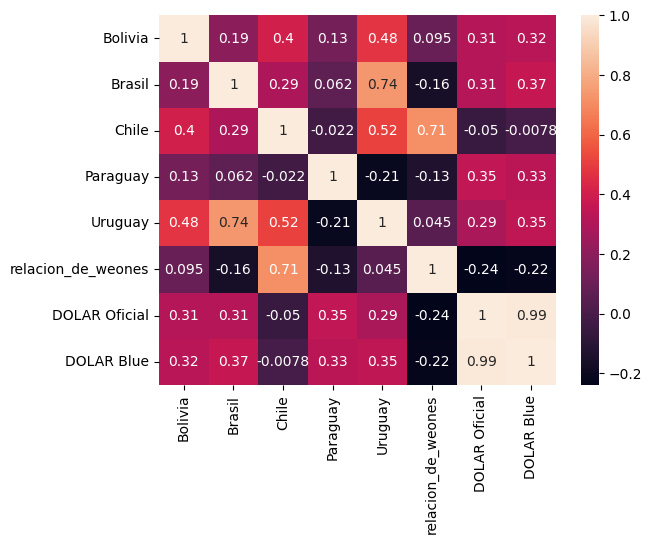

In [25]:
sns.heatmap(dfprecioycantidad.corr(), annot=True)

In [26]:
#TOMAMOS A LOS TRES PAISES CON MAYOR CORRELACION CON EL DOLAR Y LOS SUMAMOS
total = dfprecioycantidad["Uruguay"]+dfprecioycantidad["Brasil"]+dfprecioycantidad["Paraguay"]

In [27]:
regression = LinearRegression()
regression.fit(dfprecioycantidad[["DOLAR Blue"]], total)
predicciones = regression.predict(dfprecioycantidad[["DOLAR Blue"]])

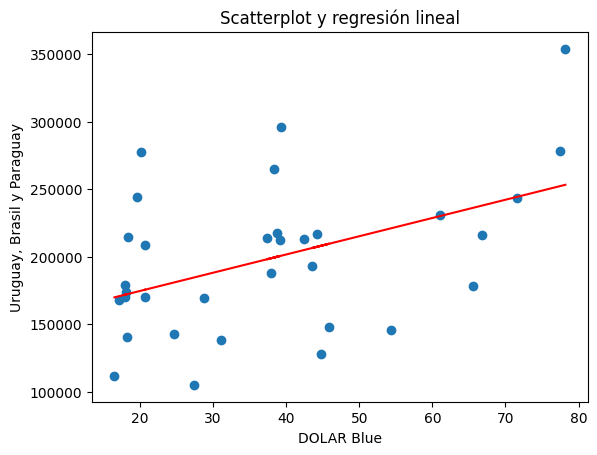

In [28]:
#aca quisimos ver si habia alguna relacion entre  el precio del dolar y la cantidad total de los turistas,
#se puede ver una leve relacion, esto puede indicar que a medida que el peso se fue devaluando, 
#se les hacia mas accesible a los otros paises poder hacer turismo en argentina
plt.scatter(x=dfprecioycantidad["DOLAR Blue"],y=total)
plt.plot(dfprecioycantidad["DOLAR Blue"], predicciones, color='red')
plt.xlabel("DOLAR Blue")
plt.ylabel('Uruguay, Brasil y Paraguay')
plt.title('Scatterplot y regresión lineal')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27754da7460>,
 'caps': [<matplotlib.lines.Line2D at 0x27754da75e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27754331d60>],
 'medians': [<matplotlib.lines.Line2D at 0x27754da7be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27754dc2670>],
 'means': []}

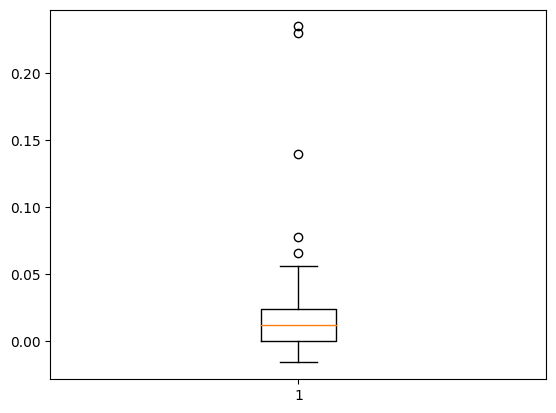

In [30]:
dfprecioycantidad['disparidad'] = (dfprecioycantidad['DOLAR Blue'] - dfprecioycantidad['DOLAR Oficial'])/dfprecioycantidad['DOLAR Oficial']
plt.boxplot(dfprecioycantidad['disparidad'])

In [32]:
dfprecioycantidad.tail()

,Bolivia,Brasil,Chile,Paraguay,Uruguay,FECHA,relacion_de_weones,DOLAR Oficial,DOLAR Blue,disparidad
28,110797,76538,63888,72198,29528,2019-10,0.221019,60.82,65.53,0.077442
29,109850,101498,59000,70456,44103,2019-11,0.181033,62.72,66.84,0.065689
30,135503,103795,134728,65900,73510,2019-12,0.355757,62.74,71.51,0.139783
31,185654,130090,90585,62637,85464,2020-01,0.195292,63.00,77.48,0.229841
32,109344,208970,75102,68968,75996,2020-02,0.162110,63.31,78.19,0.235034


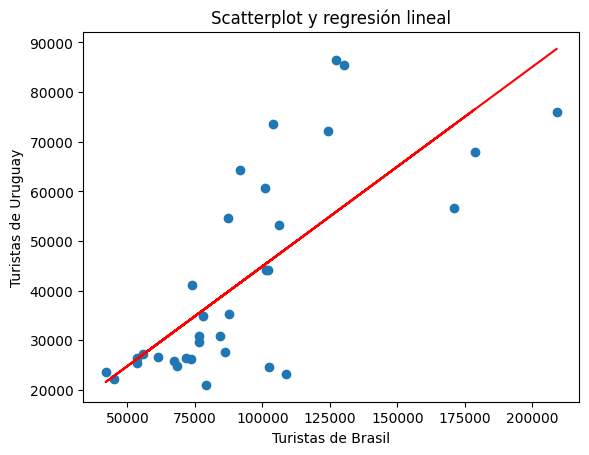

In [33]:
regression = LinearRegression()
regression.fit(dfprecioycantidad[["Brasil"]], dfprecioycantidad[["Uruguay"]])
predicciones = regression.predict(dfprecioycantidad[["Brasil"]])
plt.scatter(x=dfprecioycantidad["Brasil"],y=dfprecioycantidad["Uruguay"])
plt.plot(dfprecioycantidad["Brasil"], predicciones, color='red')
plt.xlabel("Turistas de Brasil")
plt.ylabel('Turistas de Uruguay')
plt.title('Scatterplot y regresión lineal')
plt.show()

Parte 7:

Hallazgos relacionados con el valor del dólar oficial y dólar libre en Argentina, y su relación con la cantidad de turistas entre 2017 y 2020:

Momento de estabilidad (mesetas) observado en el dólar oficial: Se identificó un periodo de estabilidad en el valor del dólar oficial entre septiembre de 2018 y julio de 2019. Durante este tiempo, no se observaron fluctuaciones significativas en el tipo de cambio.

Correlación entre el dólar libre y la cantidad de turistas provenientes de Uruguay, Paraguay y Brasil: Se encontró una correlación significativa entre el valor del dólar libre y la cantidad de turistas provenientes de Uruguay, Paraguay y Brasil. A medida que el dólar libre aumentaba, se observó un incremento en la llegada de turistas de estos países. Esto puede deberse a que a medida que el valor de la moneda argentina se devaluaba, los precios de nuestro país se hacían más accesibles para los turistas.

Correlación muy alta entre la cantidad de turistas brasileños y uruguayos: Se detectó una correlación positiva muy alta entre la cantidad de turistas brasileños y uruguayos. Esto indica que existe una fuerte relación entre la llegada de turistas de ambos países a Argentina.

Correlación negativa leve entre el dólar oficial y la relación de turistas chilenos: Se observó una correlación negativa leve entre el valor del dólar oficial y la proporción de turistas chilenos en comparación con el total de turistas. Esto sugiere que a medida que el dólar oficial aumentaba, la relación de turistas chilenos disminuía ligeramente.

Estabilidad de la disparidad entre el dólar libre y el dólar oficial: Se encontró que la disparidad entre el valor del dólar libre y el dólar oficial se mantuvo estable hasta los últimos meses de la muestra, es decir, desde octubre de 2019 hasta febrero de 2020. Durante este último período, se observaron cambios significativos en la brecha entre ambos tipos de cambio.

Estos hallazgos revelan patrones y relaciones importantes entre el valor del dólar, la cantidad de turistas y los diferentes países de origen durante el período analizado.

Parte 8:

Lectura de los dataframes: Los datos fueron obtenidos desde archivos de Excel, donde cada año se encontraba en una hoja distinta. Se utilizó el parámetro "sheet_name" para leer los datos correspondientes a cada año y se generaron dataframes separados.

Limpieza y curación de dataframes:
a) Tratamiento de valores nulos: Se identificó una alta cantidad de valores nulos en los dataframes de los valores del dólar. Esto probablemente se debió a la falta de información durante los fines de semana, cuando no se publican datos sobre el tipo de cambio. Para solucionar este problema, se utilizó la función "dropna" para eliminar los registros con valores nulos y se restablecieron los índices del dataframe resultante.

b) Transformación de fechas: Para facilitar el análisis, se convirtieron las fechas de los valores del dólar de formato diario a formato mensual. Se utilizó la función "groupby" para calcular el promedio del valor del dólar agrupado por meses y luego se convirtió la fecha a una cadena de texto ("str").

c) Conversión de formatos: En el dataframe de turistas, se realizó una conversión del valor de la cantidad de turistas a tipo entero ("int"). Además, se creó un diccionario que relacionaba las tres primeras letras de los meses con su respectivo número para convertir los meses al formato numérico. Posteriormente, se combinaron los datos de año y mes en una sola columna para que coincidiera con el formato del dataframe de los valores del dólar y así poder realizar un merge.

d)Tratamiento de valores atípicos: Durante el análisis de los datos de turistas, se detectó un valor atípico en la cantidad de turistas chilenos. Para abordar esta situación, se decidió reemplazar provisionalmente el valor atípico por 0 y posteriormente calcular el promedio de la proporción de turistas chilenos en relación con el resto de los turistas. Luego, se multiplicó este promedio por el total de turistas en el mes en el que se encontraba el valor atípico.

e) Merge de dataframes: Se realizó un merge entre los dos dataframes, utilizando la columna de fecha como clave, con el objetivo de combinar la información de los turistas con los valores del dólar.

f) Por ultimo se realizaron los graficos correspondientes

In [29]:
dfprecioycantidad.to_parquet('EJ2_Mateo_Rovere_Valentin_Dalmau')